### 0. Install necessary packages

In [47]:
import preprocessing, models, evaluation
from importlib import reload
reload(models)
reload(preprocessing)
reload(evaluation)

from preprocessing import Preprocess
from models import OgModel, AttModel
from evaluation import EvaluateModel, ExplainModel, compare_feature_impact

### 1. Load the data

In [24]:
X_train, y_train, X_val, y_val, X_test, y_test, M, S = Preprocess(time_steps=5, start_year=2000, save=False)

--- Preprocessing ---
Remove low yield observations:  2
of years:  [1988. 2003.]
Full train data available:  (24311, 393)
Train data used: (10707, 397), starting from year 2000.
- Preprocessed data -
Train data (10707, 397)
Validation data (560, 397)
Test data (472, 397)
Test data has mean 1.5 and std 0.99.



### 2. Set hyperparameters

In [25]:
epochs = 70
learning_rate = 0.0001        # Learning rate

# LSTM parameters
time_steps = 5                # Number of time steps for the RNN
num_units = 64                # Number of hidden units for LSTM cells
num_layers = 2                # Number of layers of LSTM cell
dropout = 0.35                 # Dropout rate

# Attention parameters
num_heads = 4
key_dim = 16

### 3.1 Original Model

In [26]:
og_model = OgModel(learning_rate, time_steps, num_units, num_layers, dropout)
og_model.compile()


--- Model Architecture ---
 - CNN for Weather data - 
Input W-CNN: 6x (None, 52, 1)
Output W-CNN: (None, 66)
 - CNN for Soil data - 
Input S-CNN: 11x (None, 6, 1)
Output S-CNN: (None, 44)
 - Concatenate weather, soil and management data - 
W+S+M concatenated: (None, 124)
W+S+M after Dense: (None, 64)
 - LSTM for yield data - 
LSTM input: (None, 5, 1)
LSTM output: (None, 64)
 - Combine static and dynamic features - 
Combined: (None, 128)
Combined Dense: (None, 16)
Output: (None, 1) 

Total parameters: 112659


In [27]:
og_model.fit_wrapper(X_train, y_train, X_val, y_val, epochs)

Epoch 1/70
335/335 [==============================] - 12s 16ms/step - loss: 3.2831 - val_loss: 2.4771 - lr: 1.0000e-04
Epoch 2/70
335/335 [==============================] - 4s 11ms/step - loss: 1.9670 - val_loss: 1.4676 - lr: 1.0000e-04
Epoch 3/70
335/335 [==============================] - 4s 11ms/step - loss: 1.2121 - val_loss: 0.9413 - lr: 1.0000e-04
Epoch 4/70
335/335 [==============================] - 4s 11ms/step - loss: 0.7961 - val_loss: 0.6346 - lr: 1.0000e-04
Epoch 5/70
335/335 [==============================] - 4s 11ms/step - loss: 0.5559 - val_loss: 0.4689 - lr: 1.0000e-04
Epoch 6/70
335/335 [==============================] - 4s 11ms/step - loss: 0.4178 - val_loss: 0.3663 - lr: 1.0000e-04
Epoch 7/70
335/335 [==============================] - 4s 11ms/step - loss: 0.3391 - val_loss: 0.3066 - lr: 1.0000e-04
Epoch 8/70
335/335 [==============================] - 4s 12ms/step - loss: 0.2913 - val_loss: 0.2696 - lr: 1.0000e-04
Epoch 9/70
335/335 [==============================] - 4

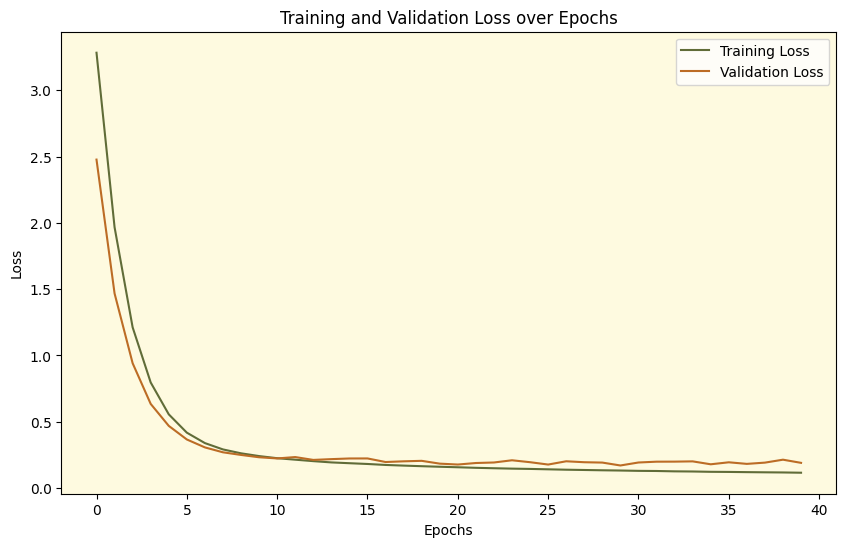

In [28]:
og_model.plot_training_history()

18/18 [==============================] - 0s 4ms/step
Training RMSE: 4.547142679542019
Validation RMSE: 5.3159476950674245 

Training MAE: 3.4307008261416505
Validation MAE: 4.192667183876038 

Training R²: 0.8257523460280085
Validation R²: 0.6804822905956187


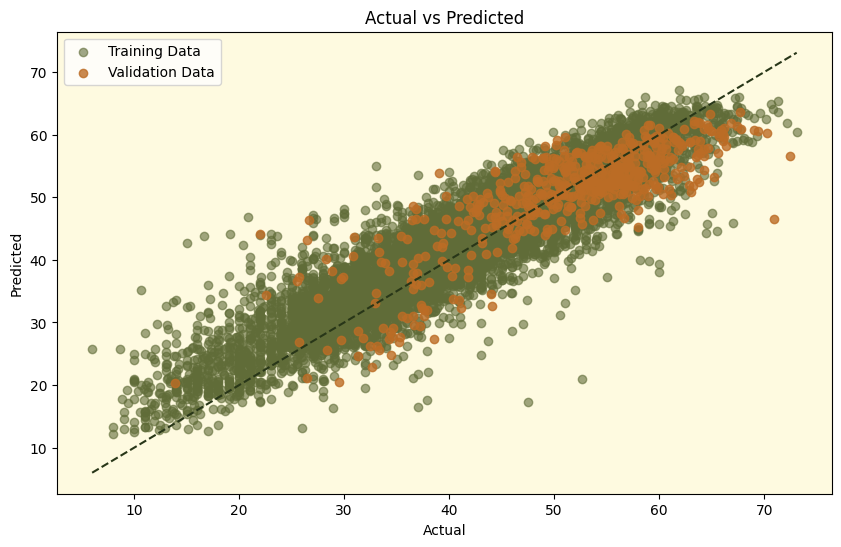

In [29]:
og_evaluator = EvaluateModel(og_model, X_train, y_train, X_val, y_val, M[0,0], S[0,0])
og_evaluator.evaluate()

### 3.2 Attention Model

In [30]:
att_model = AttModel(learning_rate, time_steps, num_units, num_layers, dropout, num_heads, key_dim, multi_head=False)
att_model.compile()


--- Model Architecture ---
 - CNN for Weather data - 
Input W-CNN: 6x (None, 52, 1)
Output W-CNN: (None, 66)
 - CNN for Soil data - 
Input S-CNN: 11x (None, 6, 1)
Output S-CNN: (None, 44)
 - Concatenate weather, soil and management data - 
W+S+M concatenated: (None, 124)
W+S+M after Dense: (None, 64)
 - LSTM for yield data - 
LSTM input: (None, 5, 1)
LSTM output: (None, 64)
 - Combine static and dynamic features - 
Combined: (None, 128)
Combined Dense: (None, 16)
Output: (None, 1) 

Total parameters: 114819


In [31]:
att_model.fit_wrapper(X_train, y_train, X_val, y_val, epochs)

Epoch 1/70
335/335 [==============================] - 15s 20ms/step - loss: 3.7345 - val_loss: 2.8418 - lr: 1.0000e-04
Epoch 2/70
335/335 [==============================] - 4s 13ms/step - loss: 2.3047 - val_loss: 1.8116 - lr: 1.0000e-04
Epoch 3/70
335/335 [==============================] - 5s 15ms/step - loss: 1.4819 - val_loss: 1.1835 - lr: 1.0000e-04
Epoch 4/70
335/335 [==============================] - 5s 15ms/step - loss: 0.9980 - val_loss: 0.8522 - lr: 1.0000e-04
Epoch 5/70
335/335 [==============================] - 5s 15ms/step - loss: 0.7045 - val_loss: 0.5940 - lr: 1.0000e-04
Epoch 6/70
335/335 [==============================] - 5s 15ms/step - loss: 0.5315 - val_loss: 0.4618 - lr: 1.0000e-04
Epoch 7/70
335/335 [==============================] - 5s 15ms/step - loss: 0.4309 - val_loss: 0.3871 - lr: 1.0000e-04
Epoch 8/70
335/335 [==============================] - 5s 15ms/step - loss: 0.3684 - val_loss: 0.3409 - lr: 1.0000e-04
Epoch 9/70
335/335 [==============================] - 5

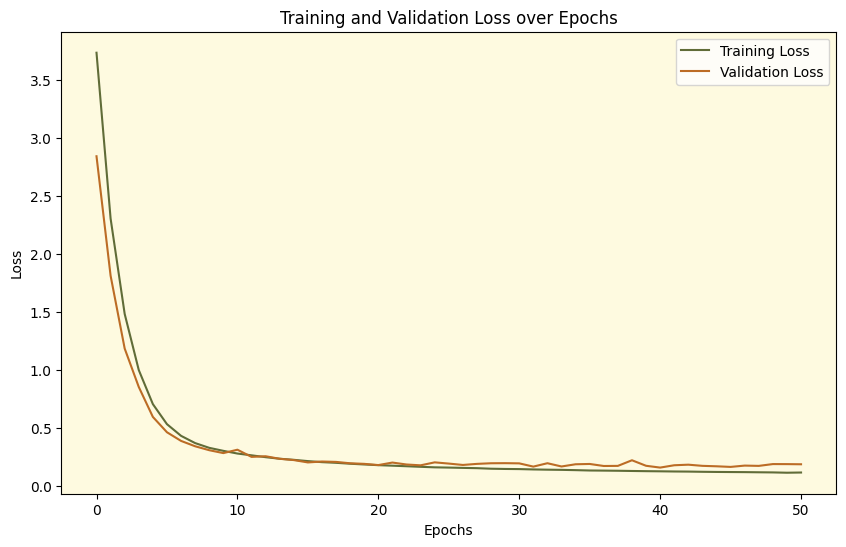

In [32]:
att_model.plot_training_history()

18/18 [==============================] - 0s 5ms/step
Training RMSE: 4.653108724299773
Validation RMSE: 5.2965381482289065 

Training MAE: 3.523166259953741
Validation MAE: 4.177602156911577 

Training R²: 0.8175364261458513
Validation R²: 0.6828112721858012


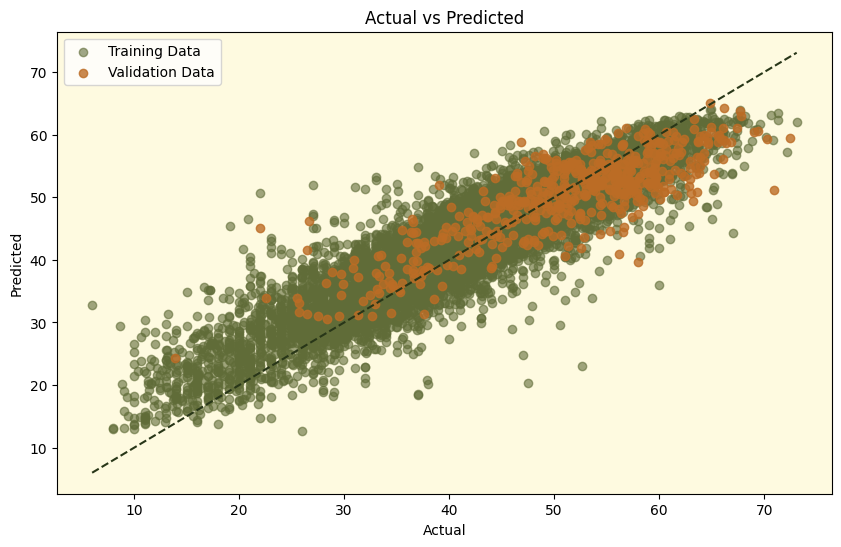

In [33]:
att_evaluator = EvaluateModel(att_model, X_train, y_train, X_val, y_val, M[0,0], S[0,0])
att_evaluator.evaluate()

In [34]:
att_model2 = AttModel(learning_rate, time_steps, num_units, num_layers, dropout, num_heads, key_dim, multi_head=True)
att_model2.compile()


--- Model Architecture ---
 - CNN for Weather data - 
Input W-CNN: 6x (None, 52, 1)
Output W-CNN: (None, 66)
 - Multi-Head Attention for Weather data - 
Output W-Attention: (None, 66)
 - CNN for Soil data - 
Input S-CNN: 11x (None, 6, 1)
Output S-CNN: (None, 44)
 - Concatenate weather, soil and management data - 
W+S+M concatenated: (None, 124)
W+S+M after Dense: (None, 64)
 - LSTM for yield data - 
LSTM input: (None, 5, 1)
LSTM output: (None, 64)
 - Combine static and dynamic features - 
Combined: (None, 128)
Combined Dense: (None, 16)
Output: (None, 1) 

Total parameters: 115268


In [35]:
att_history, att_weights = att_model2.fit_wrapper(X_train, y_train, X_val, y_val, epochs)

Epoch 1/70
335/335 [==============================] - 16s 22ms/step - loss: 3.6531 - val_loss: 2.7992 - lr: 1.0000e-04
Epoch 2/70
335/335 [==============================] - 5s 16ms/step - loss: 2.2726 - val_loss: 1.7135 - lr: 1.0000e-04
Epoch 3/70
335/335 [==============================] - 5s 16ms/step - loss: 1.3945 - val_loss: 1.0686 - lr: 1.0000e-04
Epoch 4/70
335/335 [==============================] - 5s 16ms/step - loss: 0.9096 - val_loss: 0.7609 - lr: 1.0000e-04
Epoch 5/70
335/335 [==============================] - 6s 17ms/step - loss: 0.6244 - val_loss: 0.5664 - lr: 1.0000e-04
Epoch 6/70
335/335 [==============================] - 6s 17ms/step - loss: 0.4632 - val_loss: 0.4513 - lr: 1.0000e-04
Epoch 7/70
335/335 [==============================] - 6s 17ms/step - loss: 0.3676 - val_loss: 0.3257 - lr: 1.0000e-04
Epoch 8/70
335/335 [==============================] - 6s 18ms/step - loss: 0.3108 - val_loss: 0.3192 - lr: 1.0000e-04
Epoch 9/70
335/335 [==============================] - 6

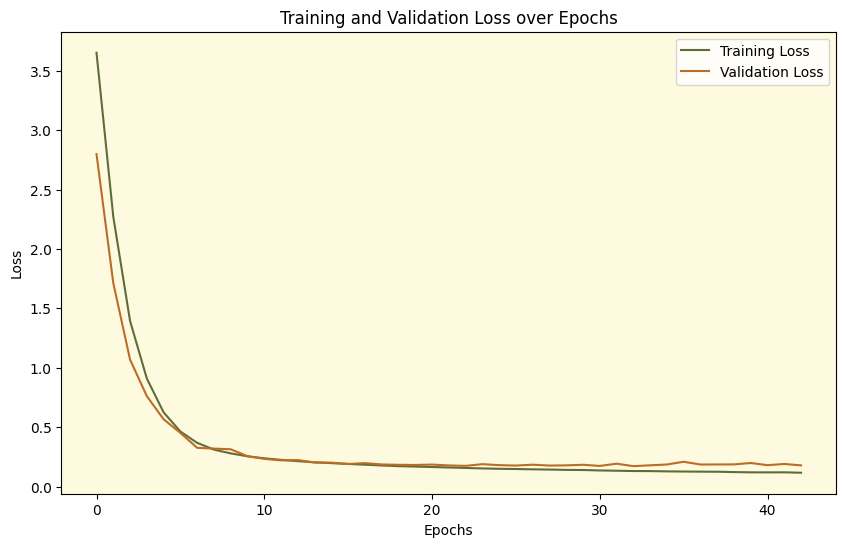

In [36]:
att_model2.plot_training_history()

18/18 [==============================] - 0s 6ms/step
Training RMSE: 4.463638071395336
Validation RMSE: 5.503156069825582 

Training MAE: 3.347093678919153
Validation MAE: 4.282701144899641 

Training R²: 0.8320934173983954
Validation R²: 0.6575815200759842


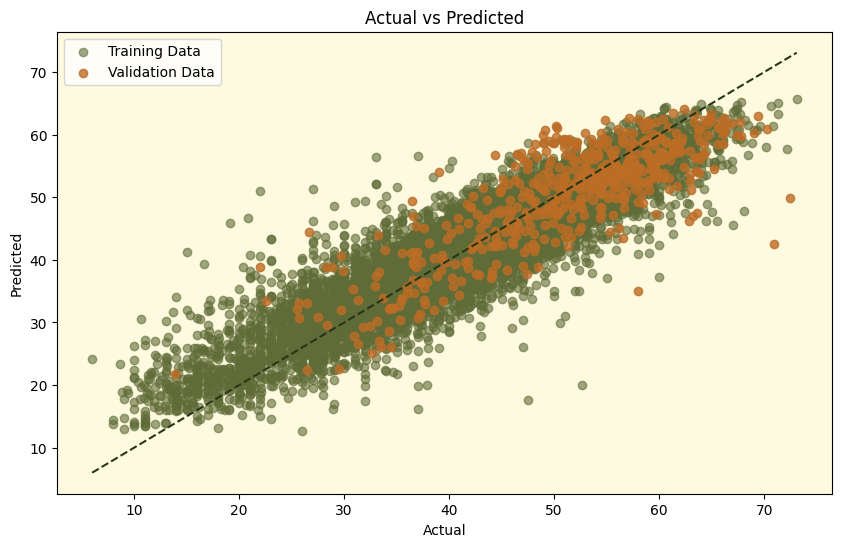

In [37]:
att_evaluator2 = EvaluateModel(att_model2, X_train, y_train, X_val, y_val, M[0,0], S[0,0])
att_evaluator2.evaluate()

In [38]:
att_weights.weights[-1]

array([0.0044859], dtype=float32)

### 4. Explainability

In [39]:
og_explainer = ExplainModel(og_model, X_train, M[:,1:], S[:,1:], time_steps)

In [40]:
og_explainer.explain_observation(X_val, index = 10, top = 5, show_table=True)

157/157 [==============================] - 1s 4ms/step
Intercept 0.6607011954426484
Prediction_local [1.07402526]
Right: 2.0906808


[('max temp_32 <= -0.60', 0.20487941627299788),
 ('M3 <= -0.46', 0.18515779842173377),
 ('max temp_35 <= -0.57', 0.13463312384040282),
 ('max temp_40 > 0.76', 0.13150075666252073),
 ('M2 > 0.80', 0.12746857097378989)]

In [41]:
indices = [i+30 for i in range(15)]
og_explainer.explain_many_observations(X_val, indices, top = 30)
og_w_impact = og_explainer.feature_importance_table("original")

att_explainer = ExplainModel(att_model, X_train, M[:,1:], S[:,1:], time_steps)
att_explainer.explain_many_observations(X_val, indices, top = 30)
att_w_impact = att_explainer.feature_importance_table("attention")

157/157 [==============================] - 1s 4ms/step
Intercept 0.7233545148652949
Prediction_local [1.4157633]
Right: 1.966617
157/157 [==============================] - 1s 5ms/step
Intercept 0.7622241408470036
Prediction_local [1.47803899]
Right: 2.0060012
157/157 [==============================] - 1s 4ms/step
Intercept -0.11272714498597924
Prediction_local [1.3332551]
Right: 2.2126944
157/157 [==============================] - 1s 4ms/step
Intercept 0.35645332722749745
Prediction_local [1.52755465]
Right: 2.031378
157/157 [==============================] - 1s 4ms/step
Intercept -0.22605734977291692
Prediction_local [0.98304312]
Right: 1.123972
157/157 [==============================] - 1s 4ms/step
Intercept 0.27483796926754267
Prediction_local [1.08567857]
Right: 1.2957307
157/157 [==============================] - 1s 4ms/step
Intercept -0.27527492770027906
Prediction_local [1.22572216]
Right: 1.0008092
157/157 [==============================] - 1s 4ms/step
Intercept 0.5236849241743

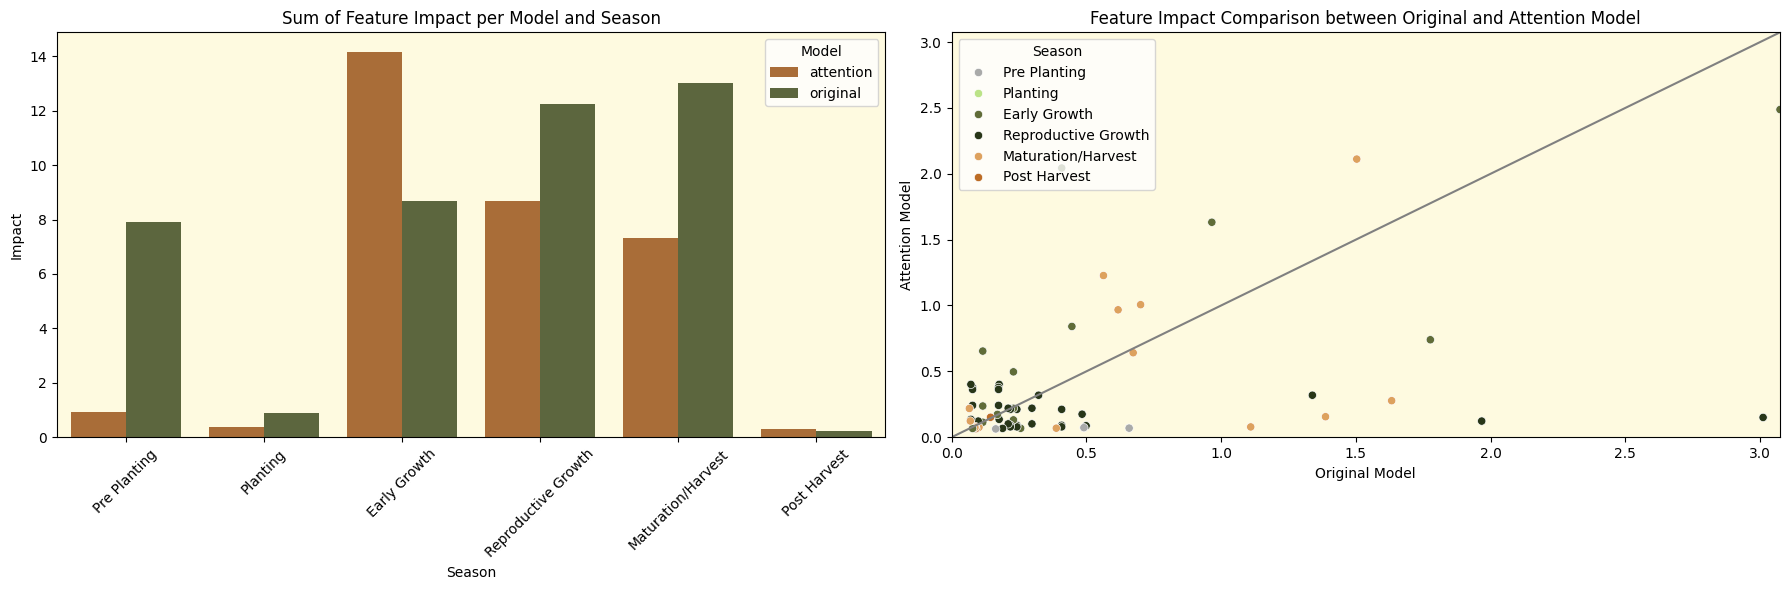

In [48]:
compare_feature_impact(og_w_impact, att_w_impact)